In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import re
from datetime import datetime
import warnings

In [356]:
df = pd.read_csv('data/Crime_Data_from_2020_to_Present.csv')

In [357]:
df.shape

(604202, 28)

In [358]:
df.keys()

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [359]:
df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604202 entries, 0 to 604201
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           604202 non-null  int64  
 1   Date Rptd       604202 non-null  object 
 2   DATE OCC        604202 non-null  object 
 3   TIME OCC        604202 non-null  int64  
 4   AREA            604202 non-null  int64  
 5   AREA NAME       604202 non-null  object 
 6   Rpt Dist No     604202 non-null  int64  
 7   Part 1-2        604202 non-null  int64  
 8   Crm Cd          604202 non-null  int64  
 9   Crm Cd Desc     604202 non-null  object 
 10  Mocodes         520647 non-null  object 
 11  Vict Age        604202 non-null  int64  
 12  Vict Sex        524299 non-null  object 
 13  Vict Descent    524294 non-null  object 
 14  Premis Cd       604195 non-null  float64
 15  Premis Desc     603922 non-null  object 
 16  Weapon Used Cd  213920 non-null  float64
 17  Weapon Des

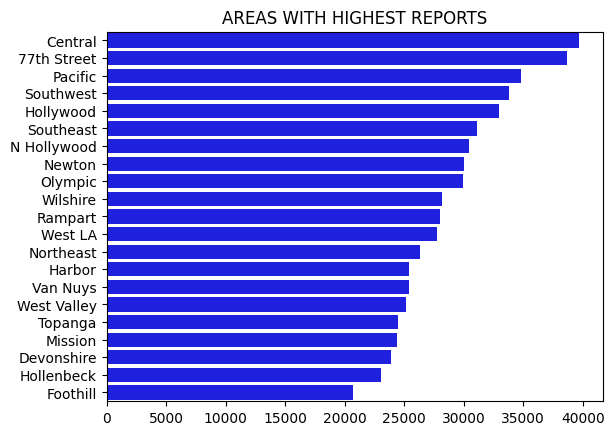

In [361]:
sns.barplot(x=df['AREA NAME'].value_counts().values,y=df['AREA NAME'].value_counts().index, color='b').set(title='AREAS WITH HIGHEST REPORTS');

In [362]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            83555
Vict Age               0
Vict Sex           79903
Vict Descent       79908
Premis Cd              7
Premis Desc          280
Weapon Used Cd    390282
Weapon Desc       390282
Status                 0
Status Desc            0
Crm Cd 1               7
Crm Cd 2          558171
Crm Cd 3          602648
Crm Cd 4          604158
LOCATION               0
Cross Street      503095
LAT                    0
LON                    0
dtype: int64

In [363]:
thresh_drop = 604202 - 83554

In [364]:
df.dropna(axis=1, thresh=thresh_drop, inplace=True)

In [365]:
(df['Crm Cd Desc'] == 'CHILD PORNOGRAPHY').sum()

166

In [366]:
df.keys()

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [367]:
#Looks like 137 different crimes

df['Crm Cd Desc'].nunique()

137

In [368]:
df['Status'].unique()

array(['AO', 'IC', 'AA', 'JA', 'JO'], dtype=object)

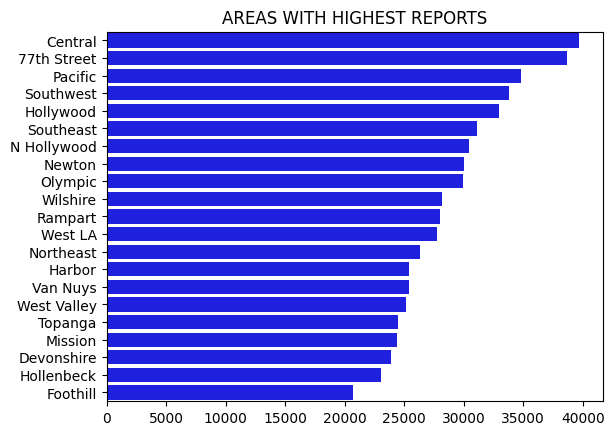

In [369]:
sns.barplot(x=df['AREA NAME'].value_counts().values,y=df['AREA NAME'].value_counts().index, color='b').set(title='AREAS WITH HIGHEST REPORTS');

In [370]:
xcrime_vc = df['Crm Cd Desc'].where(df['Crm Cd Desc'].str.contains('sex|porn|rape', na=False, flags=re.IGNORECASE)).value_counts()

In [371]:
df_xcrimes = df.where(df['Crm Cd Desc'].str.contains('sex|porn|rape', na=False, flags=re.IGNORECASE)).dropna()

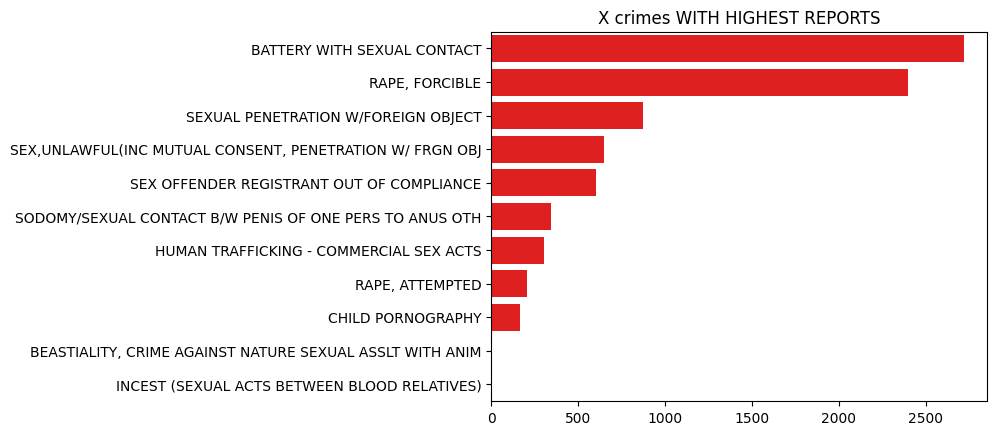

In [372]:
sns.barplot(x=xcrime_vc.values,y=xcrime_vc.index, color='r').set(title='X crimes WITH HIGHEST REPORTS');

In [373]:
df['DATE OCC'] = df['DATE OCC'].apply(lambda x: datetime.strptime(x[:10], '%m/%d/%Y'))
df['Date Rptd'] = df['Date Rptd'].apply(lambda x: datetime.strptime(x[:10], '%m/%d/%Y'))
df['timereport_diff'] = df['Date Rptd'] - df['DATE OCC']
print(df['timereport_diff'].mean())

8 days 21:32:57.705469362


In [435]:
print(f"The average time differnce beteween occurrence of the incedent and reported for general crimes: {df['timereport_diff'].mean()}")
round(df['TIME OCC'].mean())

The average time differnce beteween occurrence of the incedent and reported for general crimes: 8 days 21:32:57.705469362


1337

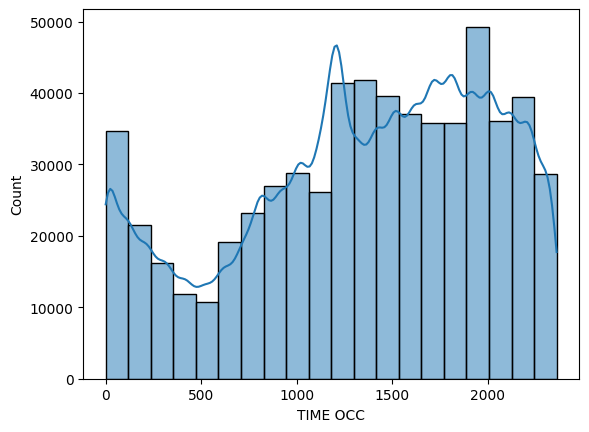

In [375]:
sns.histplot(x='TIME OCC', kde=True, bins=20,data=df);

In [376]:
df_xcrimes['DATE OCC'] = df_xcrimes['DATE OCC'].apply(lambda x: datetime.strptime(x[:10], '%m/%d/%Y'))
df_xcrimes['Date Rptd'] = df_xcrimes['Date Rptd'].apply(lambda x: datetime.strptime(x[:10], '%m/%d/%Y'))
df_xcrimes['timereport_diff'] = df_xcrimes['Date Rptd'] - df_xcrimes['DATE OCC']

In [377]:
print(f"The average time differnce beteween occurrence of the incedent and reported for Xcrimes: {df_xcrimes['timereport_diff'].mean()}")
round(df_xcrimes['TIME OCC'].mean())

The average time differnce beteween occurrence of the incedent and reported for Xcrimes: 46 days 08:42:35.512572534


1173

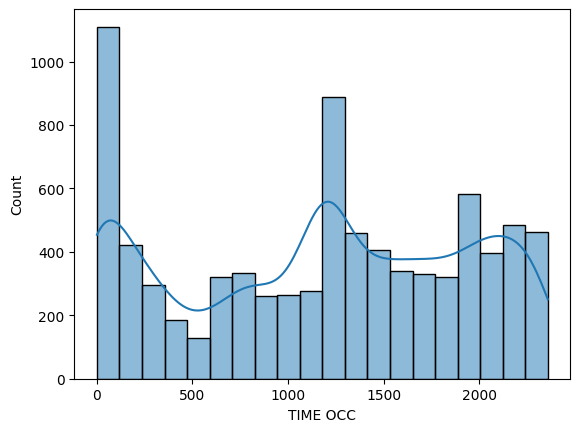

In [406]:
sns.histplot(x='TIME OCC', kde=True, bins=20,data=df_xcrimes);

In [379]:
df_xcrimes['Status Desc'].value_counts()

Invest Cont     5475
Adult Other     1704
Adult Arrest     885
Juv Other        112
Juv Arrest        96
Name: Status Desc, dtype: int64

In [380]:
df_xcrimes['Vict Descent'].value_counts()

H    3621
W    1848
B    1620
O     476
X     456
A     216
K      13
I       8
F       8
C       3
G       2
V       1
Name: Vict Descent, dtype: int64

In [382]:
decent_code_dicta = {'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican', 
                     'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander',
                     'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Indian'}

In [383]:
df_xcrimes['Vict Descent'] = df_xcrimes['Vict Descent'].map(decent_code_dicta)

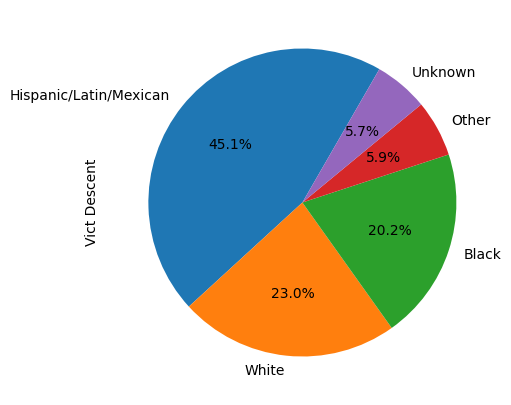

In [403]:
plt.figure(figsize=(5,5))
explode=(0.1,0.05,0.05)
df_xcrimes['Vict Descent'].value_counts()[:5].plot.pie(autopct='%1.1f%%',startangle=60);

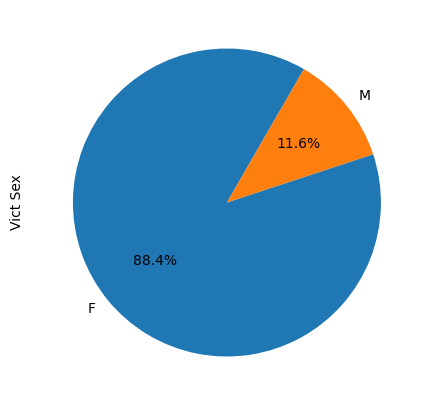

In [427]:
plt.figure(figsize=(5,5))
explode=(0.1,0.05,0.05)
df_xcrimes['Vict Sex'].value_counts()[:2].plot.pie(autopct='%1.1f%%',startangle=60);

In [438]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON', 'timereport_diff'],
      dtype='object')

In [414]:
df['Premis Desc'].nunique()

306

In [421]:
df_xcrimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON', 'timereport_diff'],
      dtype='object')

In [437]:
df_xcrimes['Vict Age'].mean()

25.999637330754354